In [3]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

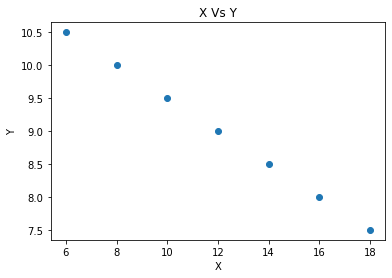

In [109]:
# Random simulation of data for linear regression using pytorch

X_array = [6,8,10,12,14,16,18]

X_array_np = np.array(X_array,dtype=np.float32)
X_array_np = X_array_np.reshape(-1,1)
X_array_tensor = Variable(torch.from_numpy(X_array_np))


Y_array = [ 10.5, 10, 9.5, 9.0, 8.5, 8.0, 7.5]
Y_array_np = np.array(Y_array,dtype=np.float32)
Y_array_np = Y_array_np.reshape(-1,1)
Y_array_tensor = Variable(torch.from_numpy(Y_array_np))

# lets visualize our data

plt.scatter(X_array,Y_array)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X Vs Y")
plt.show()

# Build a Linear Regression Model using Pytorch (50 Pts)

In [110]:
#create a class called LinearRegression , Complete the code (10 Pts)
import torch.nn as nn


class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression, self).__init__() 
        self.linear = nn.Linear(input_size, output_size)
      

    def forward(self,x):
        predict_y = self.linear(x)
        return predict_y
        


In [111]:
#define the loss for Linear Regression (5 pts)
loss_func = nn.MSELoss()

In [112]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)

In [113]:
#define the optimizer - use SGD (5 Pts)
import torch.optim as optim

learning_rate = 0.001
#learning_rate = 0.00001
#learning_rate = 0.005
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [114]:
#collect loss and run the backprop (10 pts)

      
loss_list = []
num_epochs = 1000
#num_epochs = 100
#num_epochs = 10000
for epoch in range(num_epochs):
    
    #fill in all the details
    predict_y = model(X_array_tensor)
        
    loss = loss_func(predict_y, Y_array_tensor)
    
    #run backward pass
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()
    
    loss_list.append(loss.data)
        
     # print loss
    if(epoch % 50 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data))
    

epoch 0, loss 323.5139465332031
epoch 50, loss 13.497896194458008
epoch 100, loss 13.232077598571777
epoch 150, loss 12.971489906311035
epoch 200, loss 12.716034889221191
epoch 250, loss 12.465609550476074
epoch 300, loss 12.220118522644043
epoch 350, loss 11.979462623596191
epoch 400, loss 11.743544578552246
epoch 450, loss 11.512273788452148
epoch 500, loss 11.285554885864258
epoch 550, loss 11.06330394744873
epoch 600, loss 10.845426559448242
epoch 650, loss 10.631842613220215
epoch 700, loss 10.422464370727539
epoch 750, loss 10.217207908630371
epoch 800, loss 10.015995979309082
epoch 850, loss 9.818743705749512
epoch 900, loss 9.62537956237793
epoch 950, loss 9.435819625854492


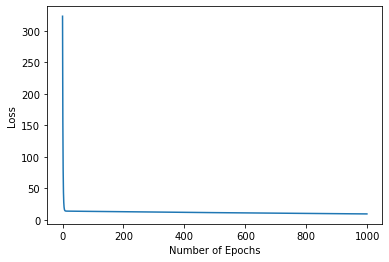

In [115]:
plt.plot(range(num_epochs),loss_list)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

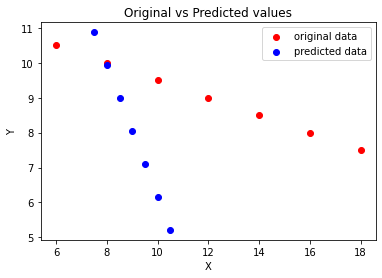

In [116]:
# predict our car price 
predicted = model(X_array_tensor).data.numpy()
plt.scatter(X_array,Y_array,label = "original data",color ="red")
plt.scatter(Y_array,predicted,label = "predicted data",color ="blue")


plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original vs Predicted values")
plt.show()

# Change the learning rate above. What do you observe? (10 pts)

In [117]:
'''
A smaller learning rate requires more training epochs, and it causes the training
process to be very slow. So it will take a longer time for model to converge.

A larger learning rate requires fewer training epochs, and it causes drastic updates
which may lead to divergent behaviors.
'''

'\nA smaller learning rate requires more training epochs, and it causes the training\nprocess to be very slow. So it will take a longer time for model to converge.\n\nA larger learning rate requires fewer training epochs, and it causes drastic updates\nwhich may lead to divergent behaviors.\n'

# Change the number of epochs. What do you observe? (10 pts)

In [118]:
'''
Changing the number of epochs effects the training process and the loss function.

If the number of epochs is smaller, the model may not have enough time to learn,
which may result in an underfit model, and the loss will be higher.

If the number of epochs is larger, the model may overfit to the training data.
The loss will be smaller on the training data, but the performance on new data will
not improve or even worse.
'''

'\nChanging the number of epochs effects the training process and the loss function.\n\nIf the number of epochs is smaller, the model may not have enough time to learn,\nwhich may result in an underfit model, and the loss will be higher.\n\nIf the number of epochs is larger, the model may overfit to the training data.\nThe loss will be smaller on the training data, but the performance on new data will\nnot improve or even worse.\n'

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------

In [135]:
# Random simulation of data for Logistic Regression using pytorch

def logistic(z):
    return 1 / (1 + np.exp(-z))

# True theta coefficients.
theta = np.array([[4], [-2]])
# Number of features.
p = len(theta)

# Number of training data points.
n = 1000
#n = 100
#n = 5000
#n = 10000
# Generate feature values from U[0,1].
np.random.seed(1)
X = np.random.rand(n, p)

# Calculate logits.
z = np.dot(X, theta)
# Calculate probabilities.
prob = logistic(z)

# Print the first 5 elements.
print(f"The first five probabilities: {np.round(prob[:5].flatten(), 2)}")

# Generate labels by sampling from Bernoulli(prob)
y = np.random.binomial(1, prob.flatten())

# Print the first 5 elements.
print(f"The first five class labels: {y[:5].flatten()}")

The first five probabilities: [0.56 0.35 0.6  0.51 0.62]
The first five class labels: [0 1 0 1 1]


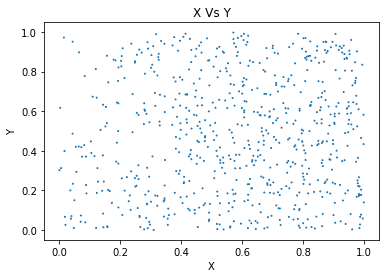

In [136]:
X_array_np = np.array(X,dtype=np.float32)
X_array_tensor = Variable(torch.from_numpy(X_array_np))

Y_array_np = np.array(y,dtype=np.float32)
Y_array_np = Y_array_np.reshape(-1,1)

Y_array_tensor = Variable(torch.from_numpy(Y_array_np))

# lets visualize our data
plt.scatter(X[:,0],X[:,1], y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X Vs Y")
plt.show()

In [137]:
#Build a Logistic Regression Model using PyTorch (50 Pts)

In [138]:
# create a class called Logistic Regression (10 Pts)
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
      

    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
      

In [139]:
#define the loss for 2 class Logistic Regression (5 pts)

loss_func = nn.BCELoss()

In [140]:
input_dim = 2
output_dim = 1
model = LogisticRegression(input_dim,output_dim)

In [141]:
#define the optimizer - use SGD (5 Pts)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [142]:
#collect loss and run backprop (10 pts)

loss_list = []
iteration_list = []
epochs = 10000
#epochs = 1000

for epoch in range(epochs):
    
    train = Variable(X_array_tensor)
    labels = Variable(Y_array_tensor)
    
    #fill in all the details
    # optimization
    optimizer.zero_grad()
    # Forward to get output
    output = model(train)
    
    # Calculate Loss
    loss = loss_func(output, labels)
   
    # store loss and iteration
    loss_list.append(loss.data)
    iteration_list.append(epoch)
    
    # backward propagation
    loss.backward()
    optimizer.step()
    
    # print loss
    if(epoch % 50 == 0):
        print('epoch {}, loss {}'.format(epoch, loss.data))


epoch 0, loss 0.6459475755691528
epoch 50, loss 0.6376727819442749
epoch 100, loss 0.6312583684921265
epoch 150, loss 0.6261325478553772
epoch 200, loss 0.6219081878662109
epoch 250, loss 0.6183210015296936
epoch 300, loss 0.6151896715164185
epoch 350, loss 0.612388551235199
epoch 400, loss 0.6098301410675049
epoch 450, loss 0.6074532270431519
epoch 500, loss 0.6052145957946777
epoch 550, loss 0.6030836701393127
epoch 600, loss 0.6010385751724243
epoch 650, loss 0.5990637540817261
epoch 700, loss 0.5971478819847107
epoch 750, loss 0.5952826738357544
epoch 800, loss 0.5934622287750244
epoch 850, loss 0.5916820764541626
epoch 900, loss 0.5899388194084167
epoch 950, loss 0.5882299542427063
epoch 1000, loss 0.5865535140037537
epoch 1050, loss 0.5849080085754395
epoch 1100, loss 0.5832923054695129
epoch 1150, loss 0.5817051529884338
epoch 1200, loss 0.5801457166671753
epoch 1250, loss 0.57861328125
epoch 1300, loss 0.5771071910858154
epoch 1350, loss 0.5756268501281738
epoch 1400, loss 0.57

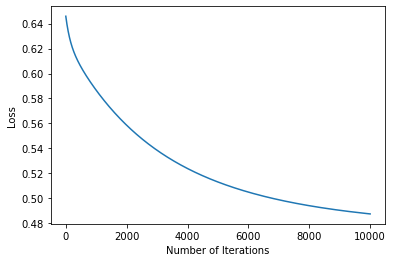

In [143]:
plt.plot(range(epochs),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [75]:
# Change the number of training samples to 100 and epochs to 1000. What do you observe?(5 pts)
'''
Reducing the number of training samples to 100 and the epochs to 1000, the loss
function does not converge to the minimum value.
Since with a fewer samples, the model will not be able to learn well, 
thus will result in a lower accuracy. And using fewer epochs results in unerfitting.
'''

'\nReducing the number of training samples to 100 and the epochs to 1000, the loss\nfunction does not converge to the minimum value.\nSince with a fewer samples, the model will not be able to learn well, \nthus will result in a lower accuracy. And using fewer epochs results in unerfitting.\n'

In [85]:
# Change the number of training samples to 5000 and epochs to 1000. What do you observe?(5 pts)
'''
Increasing the number of training samples to 5000 with 1000 epochs results in
a better performance of the model due to more samples.
But there are not enough epochs for the loss function to converge to a better value,
thus the model needs more iterations to converge to the better solution.
'''

'\nIncreasing the number of training samples to 5000 with 1000 epochs results in\na better performance of the model due to more samples.\nBut there are not enough epochs for the loss function to converge to a better value,\nthus the model needs more iterations to converge to the better solution.\n'

In [106]:
# Change the number of training samples to 10,000 and learning rate to 0.01 and increase the num of epochs to 10,000. What do you observe (5 pts)
'''
Increasing the number of training samples to 10000 with 0.01 learning rate and 10000 epochs
will result in a better performance of the model and a better accuracy of the model.
However, the model needs more training time due to more samples.
'''

'\nIncreasing the number of training samples to 10000 with 0.01 learning rate and 10000 epochs\nwill result in a better performance of the model and a better accuracy of the model.\nHowever, the model needs more training time due to more samples.\n'

In [107]:
# Change the number of training samples to 10,000 and learning rate to 0.01. Num of epochs to 1000. What do you observe?(5 pts)
'''
Increasing the number of training samples to 10000 provides the model more data
to learn from, thus a better accuracy. Decreasing the epochs to 1000 will result in an underfit model since
model cannot converge to a better solution.

'''

'\nIncreasing the number of training samples to 10000 provides the model more data\nto learn from, thus a better accuracy. Decreasing the epochs to 1000 will result in an underfit model since\nmodel cannot converge to a better solution.\n\n'